## Supervised ML Process

### ML Pathway

1. Collect and Store Data
2. Clean and Organise Data
3. Exploratory Data Analysis (Stat Analysis, Visualisation)
4. ML Models (for going beyond Data Analysis and creating product)
    a. Supervised Learning: predict an outcome
    b. Unsupervised Learning: discover patterns in Data


### ML Process: Supervised ML Tasks

- **Supervised ML**: Using *historical, labeled* data, predict a future outcome or result.
- Start with collecting and organise a data set based on history
- **Historical Labeled** dataset
- If a new feature vector appears, the model should be able to predict the label


### Supervised ML Process:
- Data
- X:Features, Y:Labels
- Splitting training and testing dataset (complex: cross validation, etc)
- Training/Fitting model
- Evaluate performance: comparing predictions with actual labels from the test set
- Fit/adjust model params
- Deploy model as a product


### Linear Regression

**HIstory and Motivation**:
- grew out of need for improving navigation methods based on astronomy during the 1700s.
- First public exposition on Linear Regression with least squares method in 1800..
- Gauss claimed that he invented least-squares in 1790s..
Building an intuitive understanding of Linear Regression: It implies a **constant straight line relationship**.
The simplest relationship is y = x.
Given the relationship of two or more variables, it becomes straightforward to predict the output value, when we encounter previously unseen feature values. 

**Important Point**: Real world data vairables hardly have a linear relationship, in this case we need to find a **line** that fits the data/that describes the relationship between the variables the best.
- We need to reduce the distance of each point from the line we come up with. 
- **Ordinary Least Squares** works by minimising the sum of the squares of the differences between the observed dependent var in the given dataset and those predicted by the linear function.

### OLS Equations

The equation of a simple straight line is y = mx + b, where m is the slope of the line and b is the intercept with y-axis. With this simple equation, there is only room for one possible feature. 
- OLS will allow us directly solve for the slope m and intercept b given a set of datapoints for x and y.
- In case of multiple features,we will need **Gradient Descent** and **Cost functions**.


### Cost Functions:

OLS is not suitable/suitable for multiple features. 
- The purpose is to define an appropriate error/cost function and to minimise it as much as possible so that our regression line fits the data in the best possible way. 
- **Residual error** is basically the difference between predicted value and the actual value, whereas, cost/loss functions are nothing but different variants of residual error.
- **Recall from Calculus**: To minimise a function we can take its derivative and set it equal to zero. 
- But mathematically it is not practical and scalable to compute the minimal of a function like this, instead we use **Gradient Descent**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

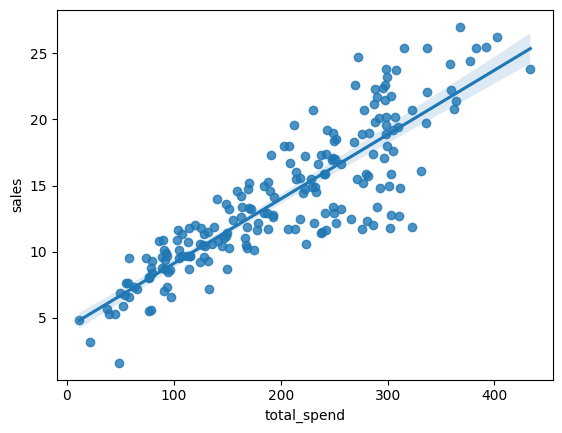

In [5]:
# With the seaborns regplot(), we can simply have a regression line going through our data using OLS for a single variable
sns.regplot(data=df, x='total_spend', y='sales')

In [7]:
X = df['total_spend']
y = df['sales']

# Polyfit here returns two beta values (weights and bias in other terms) for a linear regression for one feature
# The two variables here will establish/describe a relation between var X and y.
# Polyfit can take in higher degree polynomials
# We could be fitting some second or third order equations
# deg=1 -> y = b1.x + b0, deg=2 -> y = b2.x**2 + b1.x + b0 and so on...
b1, b2 = np.polyfit(X,y,deg=1)

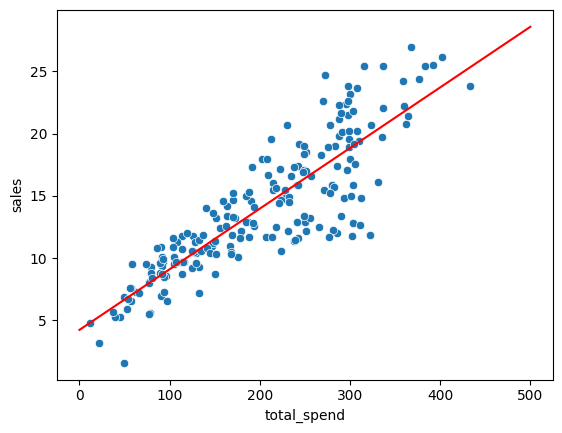

In [13]:
potential_spend = np.linspace(0,500,100)

predicted_sales = b1*potential_spend + b2

sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')